In [21]:
import spacy
# Cargar modelo de SpaCy en inglés
nlp = spacy.load('en_core_web_sm')


In [22]:
import re
import nltk
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise,roc_auc_score, roc_curve, confusion_matrix
nltk.download('punkt')  # Descarga los recursos necesarios para tokenización de NLTK
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
import os
import spacy
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


[nltk_data] Downloading package punkt to /home/diego/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/diego/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/diego/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Limpia el texto de entrada realizando las siguientes operaciones:
    - Convierte el texto a minúsculas.
    - Elimina todos los dígitos.
    - Reemplaza todos los caracteres no alfanuméricos (como puntuación) con espacios.
    
  Parámetros:
    text (str): El texto de entrada a limpiar.
    
  Retorna:
    str: El texto limpio.
    
    Ejemplo:
    >>> clean_text("¡Hola Mundo! 123")
    'hola mundo '

In [23]:
# Limpieza de datos
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\W+', ' ', text)
    return text

Elimina las stop words de una lista de tokens.
    
  Parámetros:
    tokens (list of str): La lista de tokens de la cual se eliminarán las stop words.
    
  Retorna:
    list of str: La lista de tokens sin las stop words.
    
    Ejemplo:
    >>> remove_stopwords(['this', 'is', 'a', 'sample', 'text'])
    ['sample', 'text']

In [24]:
# Eliminación de stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

  Aplica la lematización a una lista de tokens utilizando SpaCy.
    
  Parámetros:
    tokens (list of str): La lista de tokens a lematizar.
    
  Retorna:
    list of str: La lista de tokens lematizados.
    
    Ejemplo:
    >>> lemmatize_tokens(['running', 'jumps', 'easily'])
    ['run', 'jump', 'easily']

In [25]:
#Lemmatization
# Aplicar lematizador de SpaCy
def lemmatize_tokens(tokens):
    doc = nlp(" ".join(tokens))
    return [token.lemma_ for token in doc]


  Limpia y preprocesa el texto de entrada realizando las siguientes operaciones:
    - Limpieza básica (convertir a minúsculas, eliminar dígitos y caracteres no alfanuméricos).
    - Tokenización de palabras.
    - Eliminación de stop words.
    - Lematización utilizando SpaCy.
    
  Parámetros:
    text (str): El texto de entrada a preprocesar.
    
  Retorna:
    str: El texto preprocesado, con tokens lematizados unidos en una sola cadena.
    
    Ejemplo:
    >>> preprocess_text("¡Hola Mundo! Este es un ejemplo de texto 123.")
    'hola mundo ejemplo texto'

In [26]:
# Función para limpiar y preprocesar texto
def preprocess_text(text):
    # Limpieza básica
    text = clean_text(text)
    tokens = word_tokenize(text)

    # Eliminación de stop words
    tokens = [word for word in tokens if word not in stop_words]

    # Lematización
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return " ".join(lemmatized_tokens)

##Procesamos los archivos del dataset a traves de las  funcion de preprocesamiento
### Variables:
####files_names -> Guarda en una lista los nombres de los archivos procesados.
####texts-> Guarda en una lista los textos de los archivos.

In [27]:
# Ruta de los archivos de texto
directory = '../dataset/files'

In [28]:
# Leer y preprocesar todos los archivos de texto
texts = []
file_names = []
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        with open(os.path.join(directory, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            preprocessed_text = preprocess_text(text)
            texts.append(preprocessed_text)
            file_names.append(filename)
print("Número de archivos procesados:", len(texts))

Número de archivos procesados: 70


#### Aplicamos el vectorizador a los textos preprocesados y transforma los textos en una matriz TF-IDF

In [29]:
# Vectorización de los textos
tfidf_vectorizer = TfidfVectorizer()
X = tfidf_vectorizer.fit_transform(texts)
print("Dimensión de la matriz TF-IDF:", X.shape)

Dimensión de la matriz TF-IDF: (70, 2195)


##Procesamos los archivos de los datos de validación a traves de las  funcion de preprocesamiento
### Variables:
####files_names_2 -> Guarda en una lista los nombres de los archivos procesados.
####texts_2 -> Guarda en una lista los textos de los archivos.

In [30]:
# Leer y preprocesar todos los archivos de texto
test_dir = "../dataset/test_files"
texts_2 = []
file_names_2 = []
for filename in os.listdir(test_dir):
    if filename.endswith('.txt'):
        with open(os.path.join(test_dir, filename), 'r', encoding='utf-8') as file:
            text = file.read()
            preprocessed_text = preprocess_text(text)
            texts_2.append(preprocessed_text)
            file_names_2.append(filename)
print("Número de archivos procesados:", len(texts_2))
print(file_names_2)

Número de archivos procesados: 20
['FID-002.txt', 'FID-011.txt', 'FID-015.txt', 'FID-006.txt', 'FID-016.txt', 'FID-010.txt', 'FID-017.txt', 'FID-005.txt', 'FID-019.txt', 'FID-009.txt', 'FID-004.txt', 'FID-012.txt', 'FID-018.txt', 'FID-003.txt', 'FID-008.txt', 'FID-020.txt', 'FID-007.txt', 'FID-014.txt', 'FID-013.txt', 'FID-001.txt']


##Iteramos sobre los textos de validación para vectorizarlos en una matriz, obtenemos la similitud de coseno entre los vectores de los textos de validación de los del dataset original y evaluamos la que la similitud sea mayor a 30%
### Variables:
####similarity_threshold -> Variable de criterio para determinar si un texto es plagio o no de acuerdo al valor resultante de la similitud de coseno
####similarity_scores -> Guarda en una lista el valor maximo de la similitud de coseno de entra cada texto de validación y los textos del dataset

In [31]:
similarity_threshold = 0.3
similarity_scores = []

# Iterar sobre cada archivo procesado y calcular similitudes
for input_text, input_filename in zip(texts_2, file_names_2):
    # preprocessed_input_text = preprocess_text(input_text)
    input_vector = tfidf_vectorizer.transform([input_text])
    cosine_similarities = cosine_similarity(input_vector, X).flatten()
    similarity_scores.append(max(cosine_similarities))
    for i, similarity in enumerate(cosine_similarities):
      if similarity > similarity_threshold:
          print(f"Archivo: {input_filename}, Similitud: {similarity:.4f}")





Archivo: FID-016.txt, Similitud: 0.9895
Archivo: FID-010.txt, Similitud: 0.9757
Archivo: FID-005.txt, Similitud: 0.8291
Archivo: FID-005.txt, Similitud: 0.3011
Archivo: FID-018.txt, Similitud: 1.0000
Archivo: FID-014.txt, Similitud: 0.7481
Archivo: FID-014.txt, Similitud: 0.5034


###Establecemos nuestra lista de true_labels, conociendo los textos de validación que en efecto han sido copiados de nuestros textos originales del dataset

In [32]:
true_labels_dict = {
    'FID-001.txt': 0, 'FID-002.txt': 0, 'FID-003.txt': 0, 'FID-004.txt': 0, 'FID-005.txt': 1,
    'FID-006.txt': 0, 'FID-007.txt': 0, 'FID-008.txt': 0, 'FID-009.txt': 0, 'FID-010.txt': 1,
    'FID-011.txt': 0, 'FID-012.txt': 0, 'FID-013.txt': 1, 'FID-014.txt': 1, 'FID-015.txt': 1,
    'FID-016.txt': 1, 'FID-017.txt': 1, 'FID-018.txt': 1, 'FID-019.txt': 1, 'FID-020.txt': 1
}
# Crear la lista de true_labels en el orden de file_names_2
true_labels = [true_labels_dict[filename] for filename in file_names_2]

###Validamos nuestro sistema al obtener la matriz de confusion de entre los textos, y ademas obtenemos una grafica ROC que en escencia es la tasa entre los verdaderos positivos y los falsos positivos y determinamos el AUC la cual es el area bajo la curva que determina que tan buen discriminanor es el sistema.

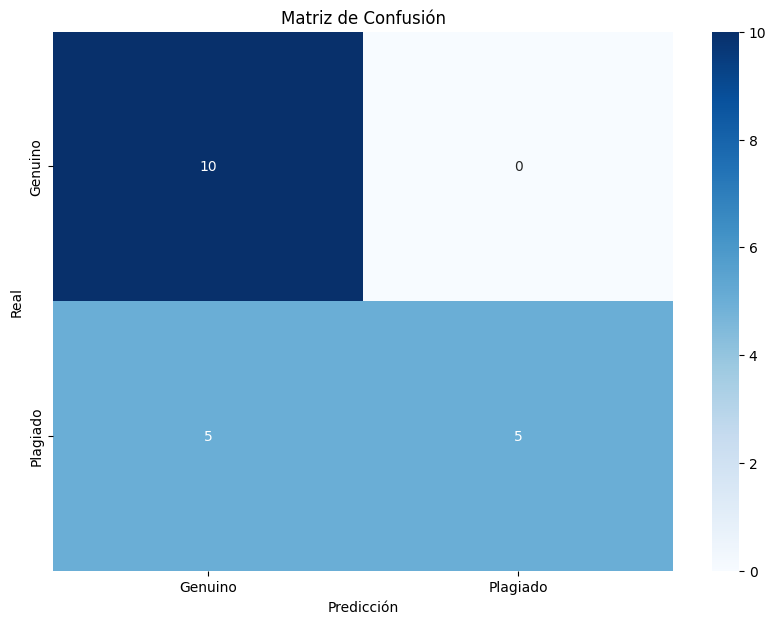

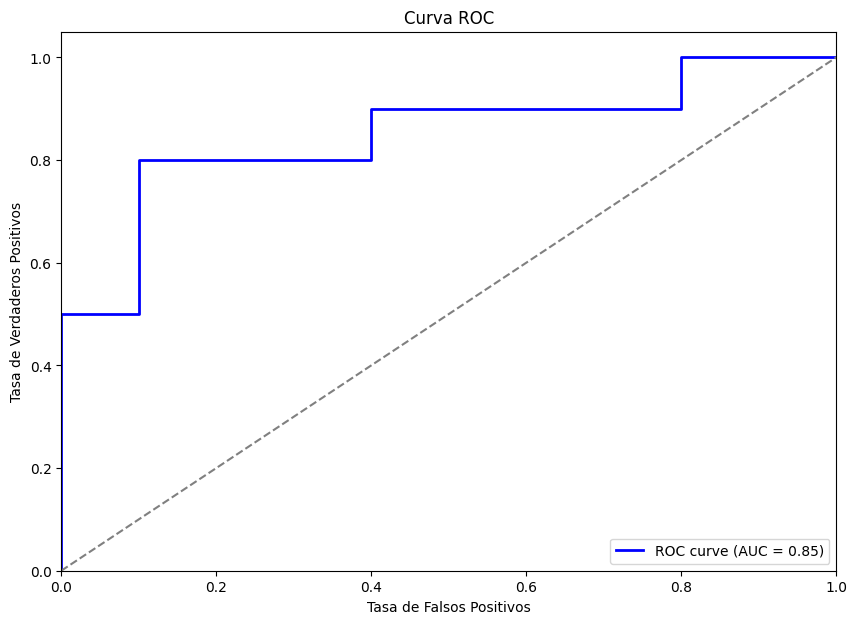

In [33]:

# Crear las etiquetas predichas en función del umbral
predicted_labels = [1 if score >= similarity_threshold else 0 for score in similarity_scores]

# Calcular la matriz de confusión
cm = confusion_matrix(true_labels, predicted_labels)

# Mostrar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Genuino', 'Plagiado'], yticklabels=['Genuino', 'Plagiado'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Calcular las tasas de verdaderos positivos y falsos positivos para la curva ROC
fpr, tpr, _ = roc_curve(true_labels, similarity_scores)

# Calcular el área bajo la curva (AUC)
roc_auc = roc_auc_score(true_labels, similarity_scores)

# Graficar la curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()